Bot Name → Unique identifier for each bot (e.g., bot1, bot2).

Bot Type → Type of bot (e.g., scheduled, user activated).

Success Rate (%) → Bot success rate percentage (float).

Average Execution Time (s) → Avg. run time in seconds (float).

Last Status → Bot’s last run status (failed, in progress, successfully ran, pending).

Run Count → Number of times bot has run.

Failure Count → Number of failed runs.

Owner → The user/owner assigned to the bot.

Last Run Timestamp → Last execution datetime.

Version → Bot version (e.g., v1.0, v2.0).

Priority → Bot priority (Low, Medium, Critical).

**Data Preprocessing**

In [ ]:
# Step 1: Import required libraries
import pandas as pd
from google.colab import files

# Step 2: Upload file
uploaded = files.upload()

# Step 3: Read Excel file
df = pd.read_excel("/content/RPA Bot Data.xlsx")   # replace with actual filename
print(df.head())


Saving RPA Bot Data.xlsx to RPA Bot Data (1).xlsx
  Bot Name        Bot Type  Success Rate (%)  Average Execution Time (s)  \
0     bot1       scheduled             63.35                        5.97   
1     bot2       scheduled             86.45                        1.31   
2     bot3  user activated             64.20                        2.54   
3     bot4  user activated             72.91                        9.85   
4     bot5       scheduled             75.42                        8.34   

        Last Status  Run Count  Failure Count   Owner   Last Run Timestamp  \
0            failed        424             26  user16  2023-01-01 00:00:00   
1       in progress        235             33   user7  2023-01-01 12:00:00   
2  successfully ran        135             31  user10  2023-01-02 00:00:00   
3       in progress        410              2  user15  2023-01-02 12:00:00   
4           pending        449             50  user16  2023-01-03 00:00:00   

  Version  Priority  
0 

In [ ]:
df = pd.read_excel('/content/RPA Bot Data.xlsx')

# ========================
# Step 4: Explore the Data
# ========================

print(" First 5 rows of data:")
print(df.head(), "\n")

print(" Last 5 rows of data:")
print(df.tail(), "\n")

print(" Shape of dataset (rows, cols):", df.shape, "\n")

print(" Column names:")
print(df.columns.tolist(), "\n")

print("Data types:")
print(df.dtypes, "\n")

print("Dataset Info:")
print(df.info(), "\n")

print(" Summary statistics (numerical cols):")
print(df.describe(), "\n")

print(" Missing values in each column:")
print(df.isnull().sum(), "\n")

 First 5 rows of data:
  Bot Name        Bot Type  Success Rate (%)  Average Execution Time (s)  \
0     bot1       scheduled             63.35                        5.97   
1     bot2       scheduled             86.45                        1.31   
2     bot3  user activated             64.20                        2.54   
3     bot4  user activated             72.91                        9.85   
4     bot5       scheduled             75.42                        8.34   

        Last Status  Run Count  Failure Count   Owner   Last Run Timestamp  \
0            failed        424             26  user16  2023-01-01 00:00:00   
1       in progress        235             33   user7  2023-01-01 12:00:00   
2  successfully ran        135             31  user10  2023-01-02 00:00:00   
3       in progress        410              2  user15  2023-01-02 12:00:00   
4           pending        449             50  user16  2023-01-03 00:00:00   

  Version  Priority  
0    v1.0       Low  
1    v1

In [ ]:
#Convert Last Run Timestamp to datetime
df["Last Run Timestamp"] = pd.to_datetime(df["Last Run Timestamp"], errors="coerce")
df["Last Run Timestamp"].head()


,Last Run Timestamp
0,2023-01-01 00:00:00
1,2023-01-01 12:00:00
2,2023-01-02 00:00:00
3,2023-01-02 12:00:00
4,2023-01-03 00:00:00


In [ ]:
#Standardize categorical fields
categorical_cols = ["Last Status", "Bot Type", "Priority"]
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

# Check unique values after standardization
for col in categorical_cols:
    print(f"{col} unique values:", df[col].unique())


Last Status unique values: ['failed' 'in progress' 'successfully ran' 'pending']
Bot Type unique values: ['scheduled' 'user activated']
Priority unique values: ['low' 'medium' 'critical' 'high']


In [ ]:
#Derived metric → Failure Rate (%)
df["Failure Rate (%)"] = df.apply(
    lambda row: (row["Failure Count"] / row["Run Count"]) * 100 if row["Run Count"] > 0 else 0,
    axis=1
)

df[["Bot Name", "Run Count", "Failure Count", "Failure Rate (%)"]].head()


,Bot Name,Run Count,Failure Count,Failure Rate (%)
0,bot1,424,26,6.132075
1,bot2,235,33,14.042553
2,bot3,135,31,22.962963
3,bot4,410,2,0.487805
4,bot5,449,50,11.135857


In [ ]:
#Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Bot Name                      0
Bot Type                      0
Success Rate (%)              0
Average Execution Time (s)    0
Last Status                   0
Run Count                     0
Failure Count                 0
Owner                         0
Last Run Timestamp            0
Version                       0
Priority                      0
Failure Rate (%)              0
dtype: int64


In [ ]:
#missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Bot Name                      0
Bot Type                      0
Success Rate (%)              0
Average Execution Time (s)    0
Last Status                   0
Run Count                     0
Failure Count                 0
Owner                         0
Last Run Timestamp            0
Version                       0
Priority                      0
Failure Rate (%)              0
dtype: int64


In [ ]:
#Extract time-based features from Last Run Timestamp
df["Last_Run_Date"] = df["Last Run Timestamp"].dt.date
df["Last_Run_Hour"] = df["Last Run Timestamp"].dt.hour
df["Last_Run_DayOfWeek"] = df["Last Run Timestamp"].dt.day_name()
print(df[["Bot Name", "Last Run Timestamp", "Last_Run_Date", "Last_Run_Hour", "Last_Run_DayOfWeek"]].head(10))

  Bot Name  Last Run Timestamp Last_Run_Date  Last_Run_Hour Last_Run_DayOfWeek
0     bot1 2023-01-01 00:00:00    2023-01-01              0             Sunday
1     bot2 2023-01-01 12:00:00    2023-01-01             12             Sunday
2     bot3 2023-01-02 00:00:00    2023-01-02              0             Monday
3     bot4 2023-01-02 12:00:00    2023-01-02             12             Monday
4     bot5 2023-01-03 00:00:00    2023-01-03              0            Tuesday
5     bot6 2023-01-03 12:00:00    2023-01-03             12            Tuesday
6     bot7 2023-01-04 00:00:00    2023-01-04              0          Wednesday
7     bot8 2023-01-04 12:00:00    2023-01-04             12          Wednesday
8     bot9 2023-01-05 00:00:00    2023-01-05              0           Thursday
9    bot10 2023-01-05 12:00:00    2023-01-05             12           Thursday


In [ ]:
#success rate vs execution time.
df["Efficiency"] = df["Success Rate (%)"] / df["Average Execution Time (s)"]
print(df[["Bot Name", "Success Rate (%)", "Average Execution Time (s)", "Efficiency"]].head(10))

  Bot Name  Success Rate (%)  Average Execution Time (s)  Efficiency
0     bot1             63.35                        5.97   10.611390
1     bot2             86.45                        1.31   65.992366
2     bot3             64.20                        2.54   25.275591
3     bot4             72.91                        9.85    7.402030
4     bot5             75.42                        8.34    9.043165
5     bot6             90.22                        6.28   14.366242
6     bot7             98.31                        4.43   22.191874
7     bot8             90.46                        9.12    9.918860
8     bot9             90.16                        5.87   15.359455
9    bot10             66.40                        3.13   21.214058


In [ ]:
#Failure Severity
#Classify bots into buckets based on failure rate (for monitoring).
def failure_severity(rate):
    if rate > 20: return "high"
    elif rate > 10: return "medium"
    else: return "low"

df["Failure Severity"] = df["Failure Rate (%)"].apply(failure_severity)
print(df[["Bot Name", "Failure Rate (%)", "Failure Severity"]].head(10))

  Bot Name  Failure Rate (%) Failure Severity
0     bot1          6.132075              low
1     bot2         14.042553           medium
2     bot3         22.962963             high
3     bot4          0.487805              low
4     bot5         11.135857           medium
5     bot6          0.854701              low
6     bot7         13.793103           medium
7     bot8         16.129032           medium
8     bot9          6.572770              low
9    bot10         10.315789           medium


In [ ]:
#Normalize/Scale numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["Success Rate (%)", "Average Execution Time (s)", "Failure Rate (%)"]] = scaler.fit_transform(
    df[["Success Rate (%)", "Average Execution Time (s)", "Failure Rate (%)"]]
)
print(df[["Bot Name", "Success Rate (%)", "Average Execution Time (s)", "Failure Rate (%)"]].head(10))


  Bot Name  Success Rate (%)  Average Execution Time (s)  Failure Rate (%)
0     bot1          0.036666                    0.580128          0.022075
1     bot2          0.646004                    0.082265          0.050553
2     bot3          0.059087                    0.213675          0.082667
3     bot4          0.288842                    0.994658          0.001756
4     bot5          0.355051                    0.833333          0.040089
5     bot6          0.745450                    0.613248          0.003077
6     bot7          0.958850                    0.415598          0.049655
7     bot8          0.751781                    0.916667          0.058065
8     bot9          0.743867                    0.569444          0.023662
9    bot10          0.117119                    0.276709          0.037137


In [ ]:
#Owner-level aggregation (for dashboards)
#Group bots by owner to calculate average success rate, total failures
owner_summary = df.groupby("Owner").agg({
    "Bot Name": "count",
    "Failure Count": "sum",
    "Run Count": "sum",
    "Success Rate (%)": "mean"
}).rename(columns={"Bot Name": "Bot Count"})
print(owner_summary)

        Bot Count  Failure Count  Run Count  Success Rate (%)
Owner                                                        
user1           4            124        900          0.487998
user10          5            199       1046          0.397362
user11          6            179       1001          0.326299
user12          5            145       1851          0.520971
user13          4             74       1274          0.326959
user14          3             48        839          0.553592
user15         10            218       2287          0.445291
user16          9            239       2849          0.558428
user17          9            181       2795          0.470178
user18          2             44        476          0.477974
user19          2             21        432          0.849380
user2           7            119       2339          0.499001
user20          2             50        246          0.425350
user3           4             71        705          0.669414
user4   

In [ ]:
# ==============================
# Exploratory Data Analysis (EDA) on RPA Bot Data
# ==============================

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe(include="all"))

# Step 4: Convert datetime column
df["Last Run Timestamp"] = pd.to_datetime(df["Last Run Timestamp"], errors="coerce")

# Step 5: Standardize categorical columns
for col in ["Bot Type", "Last Status", "Priority"]:
    df[col] = df[col].str.strip().str.lower()

print("\nUnique values in categorical columns:")
for col in ["Bot Type", "Last Status", "Priority"]:
    print(f"{col}:", df[col].unique())

# Step 6: Feature Engineering
df["Failure Rate (%)"] = (df["Failure Count"] / df["Run Count"]) * 100
df["Efficiency"] = df["Success Rate (%)"] / df["Average Execution Time (s)"]
df["Last_Run_Date"] = df["Last Run Timestamp"].dt.date
df["Last_Run_Hour"] = df["Last Run Timestamp"].dt.hour
df["Last_Run_DayOfWeek"] = df["Last Run Timestamp"].dt.day_name()

# Classify bots based on failure severity
def failure_severity(rate):
    if rate > 20: return "high"
    elif rate > 10: return "medium"
    else: return "low"
df["Failure Severity"] = df["Failure Rate (%)"].apply(failure_severity)


Shape: (100, 17)

Columns: ['Bot Name', 'Bot Type', 'Success Rate (%)', 'Average Execution Time (s)', 'Last Status', 'Run Count', 'Failure Count', 'Owner', 'Last Run Timestamp', 'Version', 'Priority', 'Failure Rate (%)', 'Last_Run_Date', 'Last_Run_Hour', 'Last_Run_DayOfWeek', 'Efficiency', 'Failure Severity']

Data Types:
 Bot Name                              object
Bot Type                              object
Success Rate (%)                     float64
Average Execution Time (s)           float64
Last Status                           object
Run Count                              int64
Failure Count                          int64
Owner                                 object
Last Run Timestamp            datetime64[ns]
Version                               object
Priority                              object
Failure Rate (%)                     float64
Last_Run_Date                         object
Last_Run_Hour                          int32
Last_Run_DayOfWeek                    object


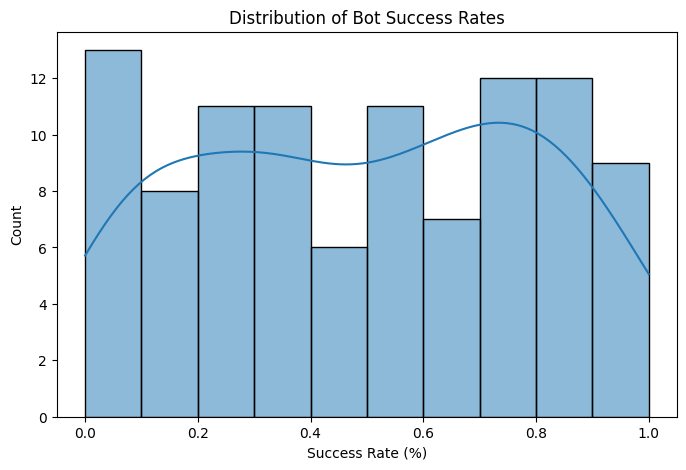

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Success Rate (%)"], bins=10, kde=True)
plt.title("Distribution of Bot Success Rates")
plt.show()

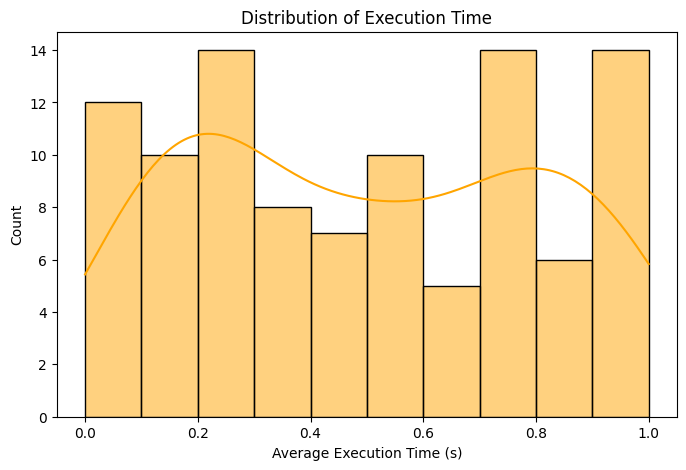

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Average Execution Time (s)"], bins=10, kde=True, color="orange")
plt.title("Distribution of Execution Time")
plt.show()


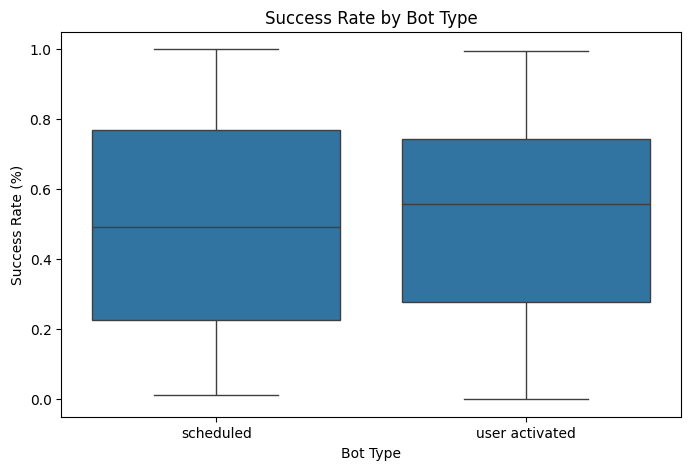

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Bot Type", y="Success Rate (%)", data=df)
plt.title("Success Rate by Bot Type")
plt.show()

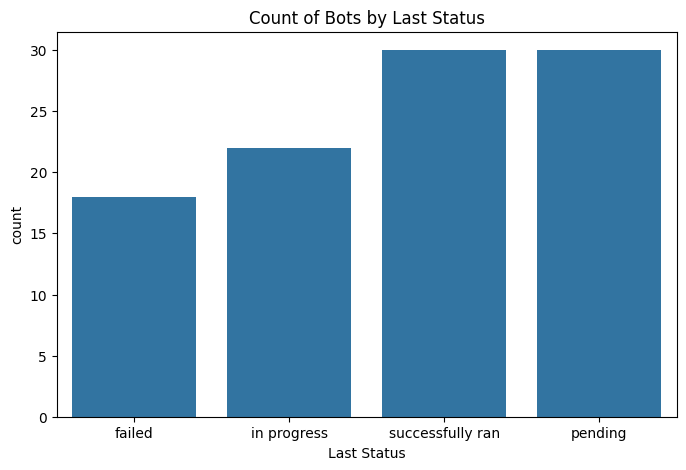

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Last Status", data=df)
plt.title("Count of Bots by Last Status")
plt.show()

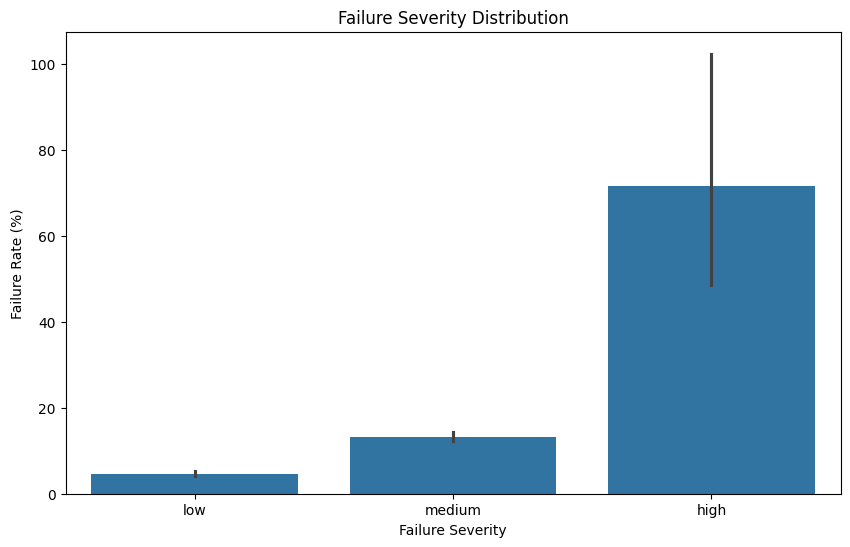

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Failure Severity", y="Failure Rate (%)", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Failure Severity Distribution")
plt.show()

<Figure size 1200x600 with 0 Axes>

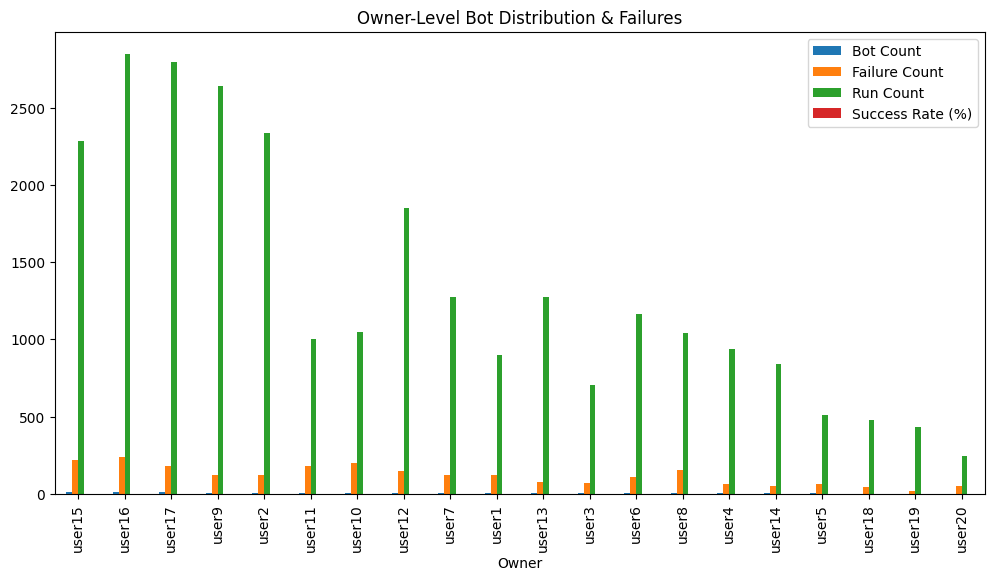

In [ ]:
plt.figure(figsize=(12,6))
owner_summary = df.groupby("Owner").agg({
    "Bot Name":"count",
    "Failure Count":"sum",
    "Run Count":"sum",
    "Success Rate (%)":"mean"
}).rename(columns={"Bot Name":"Bot Count"})
owner_summary.sort_values("Bot Count", ascending=False).plot(
    kind="bar", figsize=(12,6), title="Owner-Level Bot Distribution & Failures"
)
plt.show()

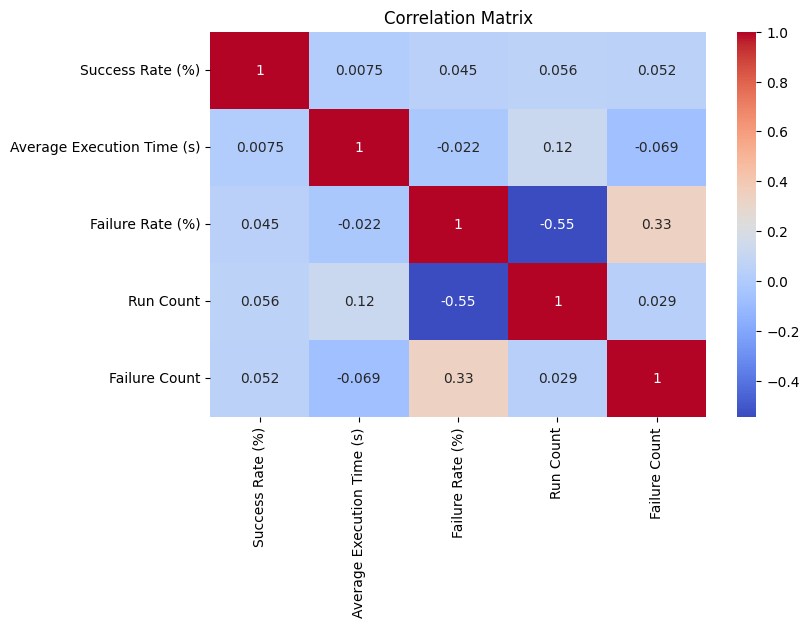

In [ ]:
# Step 8: Correlation Analysis
plt.figure(figsize=(8,5))
sns.heatmap(df[["Success Rate (%)", "Average Execution Time (s)", "Failure Rate (%)", "Run Count", "Failure Count"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Step 9: Key Findings
print("\nKey Findings:")
print("1. Avg Success Rate:", round(df["Success Rate (%)"].mean(), 2))
print("2. Avg Execution Time:", round(df["Average Execution Time (s)"].mean(), 2))
print("3. Bots with High Failure (>20%):", df[df["Failure Severity"]=="high"]["Bot Name"].tolist())
print("4. Most Bots Owned By:", df["Owner"].value_counts().idxmax(),
      "with", df["Owner"].value_counts().max(), "bots")


Key Findings:
1. Avg Success Rate: 0.5
2. Avg Execution Time: 0.5
3. Bots with High Failure (>20%): ['bot3', 'bot16', 'bot19', 'bot24', 'bot28', 'bot30', 'bot31', 'bot34', 'bot39', 'bot44', 'bot57', 'bot69', 'bot84', 'bot90', 'bot91', 'bot92', 'bot93', 'bot95']
4. Most Bots Owned By: user15 with 10 bots


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Configuration ---
file_name = "/content/RPA Bot Data.xlsx"
target_column_status = 'Last Status'
top_n_bots = 10 # Number of top bots to show for failure contribution

# Load the dataset
try:
    df = pd.read_excel(file_name)
except FileNotFoundError:
    print(f"Error: The file {file_name} was not found.")
    exit()

# --- 1. Check Imbalance in the primary target variable: 'Last Status' ---

status_counts = df[target_column_status].value_counts()
total_records = len(df)
status_percentages = (status_counts / total_records) * 100

print("--- Imbalance Check: 'Last Status' Distribution ---")
print("Counts:")
print(status_counts.to_string())
print("\nPercentages:")
print(status_percentages.to_string())

# Create a bar plot for Last Status imbalance
plt.figure(figsize=(9, 6))
status_counts.plot(kind='bar', color=['darkblue', 'skyblue', 'lightcoral', 'lightgray'])
plt.title('Distribution of Bot Last Status', fontsize=14)
plt.xlabel('Last Status', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
status_plot_filename = 'last_status_imbalance_distribution.png'
plt.savefig(status_plot_filename)
plt.close()

# --- 2. Check Imbalance in Failure Contribution: 'Failure Count' by Bot Name ---

# Group by Bot Name and sum the Failure Count, then sort
bot_failure_counts = df.groupby('Bot Name')['Failure Count'].sum().sort_values(ascending=False)
total_failures = bot_failure_counts.sum()

print("\n--- Imbalance Check: Failure Count Contribution by Bot Name ---")
if total_failures > 0:
    # Get the top N contributing bots
    top_bot_failures = bot_failure_counts.head(top_n_bots)

    top_bot_percentages = (top_bot_failures / total_failures) * 100

    print(f"Total Failures in Dataset: {total_failures}")
    print(f"\nTop {top_n_bots} Bots Failure Counts:")
    print(top_bot_failures.to_string())
    print(f"\nTop {top_n_bots} Bots Failure Percentages (out of total failures):")
    print(top_bot_percentages.to_string())

    # Create a bar plot for Bot Failure Contribution
    plt.figure(figsize=(12, 7))
    top_bot_failures.plot(kind='bar', color='darkred')

    plt.title(f'Failure Count Distribution (Top {top_n_bots} Bots)', fontsize=14)
    plt.xlabel('Bot Name', fontsize=12)
    plt.ylabel('Total Failure Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot
    bot_failure_plot_filename = 'bot_failure_count_imbalance.png'
    plt.savefig(bot_failure_plot_filename)
    plt.close()

    print(f"\nSaved plots: '{status_plot_filename}' and '{bot_failure_plot_filename}'")
else:
    print("Total 'Failure Count' is zero. Cannot check for failure imbalance across bots.")

--- Imbalance Check: 'Last Status' Distribution ---
Counts:
Last Status
pending             30
successfully ran    30
in progress         22
failed              18

Percentages:
Last Status
pending             30.0
successfully ran    30.0
in progress         22.0
failed              18.0

--- Imbalance Check: Failure Count Contribution by Bot Name ---
Total Failures in Dataset: 2349

Top 10 Bots Failure Counts:
Bot Name
bot27    50
bot91    50
bot8     50
bot5     50
bot84    49
bot98    49
bot92    49
bot80    49
bot37    49
bot10    49

Top 10 Bots Failure Percentages (out of total failures):
Bot Name
bot27    2.128565
bot91    2.128565
bot8     2.128565
bot5     2.128565
bot84    2.085994
bot98    2.085994
bot92    2.085994
bot80    2.085994
bot37    2.085994
bot10    2.085994

Saved plots: 'last_status_imbalance_distribution.png' and 'bot_failure_count_imbalance.png'


In [ ]:
# Run this command first in your environment
!pip install ydata-synthetic pandas numpy

ERROR: Ignored the following versions that require a different python version: 0.0.0 Requires-Python >=3.6, <3.9; 0.1.1 Requires-Python >=3.6, <3.9; 0.1.2 Requires-Python >=3.6, <3.9; 0.1.3 Requires-Python >=3.6, <3.9; 0.10.0 Requires-Python >=3.8, <3.11; 0.2.0 Requires-Python >=3.6, <3.9; 0.2.1 Requires-Python >=3.6, <3.9; 0.2.2 Requires-Python >=3.6, <3.9; 0.2.3 Requires-Python >=3.6, <3.9; 0.2.4 Requires-Python >=3.6, <3.9; 0.3.0 Requires-Python >=3.6, <3.9; 0.3.1 Requires-Python >=3.6, <3.9; 0.3.2 Requires-Python >=3.6, <3.9; 0.3.3 Requires-Python >=3.6, <3.9; 0.3.4 Requires-Python >=3.6, <3.9; 0.4.0 Requires-Python >=3.6, <3.9; 0.5.0 Requires-Python >=3.6, <3.9; 0.6.0 Requires-Python >=3.6, <3.9; 0.6.1 Requires-Python >=3.6, <3.9; 0.7.0 Requires-Python >=3.6, <3.9; 0.7.1 Requires-Python >=3.6, <3.9; 0.8.0 Requires-Python >=3.6, <3.9; 0.9.0 Requires-Python >=3.8, <3.11; 1.0.0 Requires-Python >=3.8, <3.11; 1.0.1 Requires-Python >=3.8, <3.11; 1.1.0 Requires-Python >=3.9, <3.11; 1.2.0

In [ ]:
import pandas as pd
import numpy as np
import os
from ydata_synthetic.synthesizers.gan import CTGAN
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters

# --- Configuration ---
FILE_NAME = "RPA Bot Data.xlsx - Sheet1.csv"
TARGET_SIZE_MULTIPLIER = 5  # Generate 5x the original number of records (100 * 5 = 500)
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# --- 1. Load Data ---
try:
    df = pd.read_csv(FILE_NAME)
    print(f"Original dataset loaded with {len(df)} rows.")
except FileNotFoundError:
    print(f"Error: File {FILE_NAME} not found. Please ensure the file is in the correct path.")
    exit()

# --- 2. Data Preparation and Feature Definition ---

# Convert the timestamp to a numerical feature (e.g., Unix timestamp)
# or a categorical feature (Day of Week). Numerical is often better for GANs.
# We'll use the Unix timestamp (seconds since epoch).
df['Last Run Timestamp'] = pd.to_datetime(df['Last Run Timestamp'])
df['Last Run Time Seconds'] = df['Last Run Timestamp'].apply(lambda x: x.timestamp())

# Drop the original timestamp column
df_gan = df.drop(columns=['Last Run Timestamp']).copy()

# Rename columns to remove special characters for simpler GAN processing
df_gan.columns = df_gan.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

# Define the column types for the CTGAN model
numerical_cols = [
    'SuccessRate',
    'AverageExecutionTimes',
    'RunCount',
    'FailureCount',
    'LastRunTimeSeconds'
]

categorical_cols = [
    'BotName',
    'BotType',
    'LastStatus',
    'Owner',
    'Version',
    'Priority'
]

# Ensure the columns are of the correct type
for col in categorical_cols:
    df_gan[col] = df_gan[col].astype('category')
for col in numerical_cols:
    df_gan[col] = pd.to_numeric(df_gan[col])


# --- 3. CTGAN Training and Generation ---

# Define the model and training parameters
# Note: You can adjust epochs and latent_dim based on computational power and desired quality.
ctgan_model_params = ModelParameters(
    batch_size=50,
    lr=2e-4,
    betas=(0.5, 0.9),
    latent_dim=128,
    data_dim=df_gan.shape[1],
)

ctgan_train_params = TrainParameters(
    epochs=200,  # Increased epochs for better quality with small data
    pac=10,
)

# Initialize the CTGAN synthesizer
synthesizer = CTGAN(
    model_parameters=ctgan_model_params,
    n_cols=numerical_cols,
    n_cat=categorical_cols,
    random_state=RANDOM_SEED
)

print("\n--- Phase 3: Training CTGAN Model (200 Epochs) ---")

# Train the model (This step requires a good CPU/GPU)
synthesizer.train(
    df_gan,
    train_parameters=ctgan_train_params,
    num_cols=numerical_cols,
    cat_cols=categorical_cols
)

# --- 4. Generate the Synthetic Data ---
n_samples_to_generate = len(df) * TARGET_SIZE_MULTIPLIER
synthetic_data_raw = synthesizer.sample(n_samples_to_generate)

# --- 5. Post-processing and Final Output ---

# Re-convert the Unix timestamp back to a readable datetime format
synthetic_data_raw['Last Run Timestamp'] = pd.to_datetime(synthetic_data_raw['LastRunTimeSeconds'], unit='s')
synthetic_data = synthetic_data_raw.drop(columns=['LastRunTimeSeconds'])

# Restore original column names (best effort, may need manual mapping if original names had special chars)
synthetic_data.columns = df.drop(columns=['Last Run Timestamp']).columns.tolist() + ['Last Run Timestamp']


print(f"\nSynthetic data generation complete!")
print(f"Original Data Size: {len(df)} rows")
print(f"Synthetic Data Size: {len(synthetic_data)} rows")

print("\nFirst 5 Synthetic Records (Statistically matched to original data):")
# Use the final synthetic data for your project
print(synthetic_data.head().to_markdown(index=False, numalign="left", stralign="left"))

# Combine Original and Synthetic Data
final_combined_dataset = pd.concat([df, synthetic_data], ignore_index=True)
print(f"\nFinal Combined Dataset Size: {len(final_combined_dataset)} rows.")

Anomaly
Normal       760
Anomalous     40
Name: count, dtype: int64


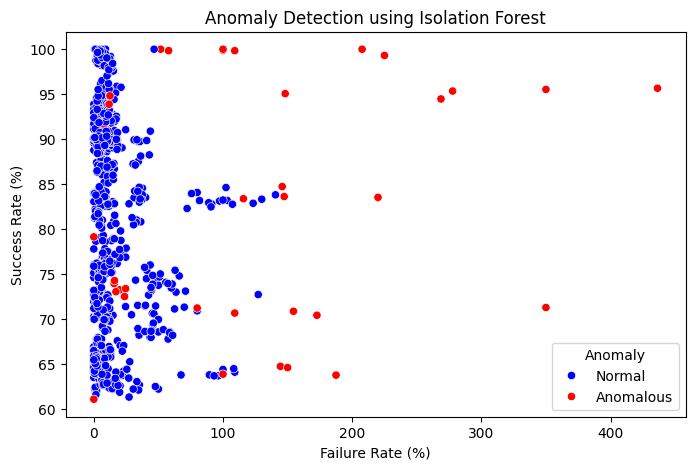

Top 10 Anomalous Bots:
    Bot Name  Success Rate (%)  Failure Rate (%)  Average Execution Time (s)  \
21     bot22             73.24         19.900498                        0.54   
27     bot28             83.62        147.368421                        9.59   
29     bot30             99.87        100.000000                        6.10   
90     bot91             95.35        277.777778                        2.65   
114   bot115             73.38         24.607330                        0.47   
118   bot119            100.00        100.000000                        5.98   
119   bot120             92.28          8.883827                        0.77   
127   bot128             73.94         15.686275                        0.67   
130   bot131             95.06        148.148148                        2.75   
185   bot186             94.77         12.280702                        0.82   

      Owner  
21   user10  
27    user1  
29   user14  
90   user15  
114  user10  
118  user14 

In [ ]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Data
df = pd.read_csv("/content/RPA_Bot_Data_Synthetic_800_Rows.csv")

# Step 3: Feature Engineering (if not already done)
df["Failure Rate (%)"] = (df["Failure Count"] / df["Run Count"]) * 100
df["Efficiency"] = df["Success Rate (%)"] / df["Average Execution Time (s)"]

# Step 4: Select numerical features
features = [
    "Success Rate (%)",
    "Average Execution Time (s)",
    "Failure Count",
    "Run Count",
    "Failure Rate (%)",
    "Efficiency"
]
X = df[features]

# Step 5: Scale data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
y_pred = iso.fit_predict(X_scaled)

# Step 7: Add results to dataframe
df["Anomaly"] = y_pred
df["Anomaly"] = df["Anomaly"].map({1: "Normal", -1: "Anomalous"})

# Step 8: Count anomalies
print(df["Anomaly"].value_counts())

# Step 9: Visualize anomalies
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Failure Rate (%)"], y=df["Success Rate (%)"], hue=df["Anomaly"], palette={"Normal": "blue", "Anomalous": "red"})
plt.title("Anomaly Detection using Isolation Forest")
plt.show()

# Step 10: Review Anomalous Bots
anomalous_bots = df[df["Anomaly"] == "Anomalous"]
print("Top 10 Anomalous Bots:")
print(anomalous_bots[["Bot Name", "Success Rate (%)", "Failure Rate (%)", "Average Execution Time (s)", "Owner"]].head(10))
